# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Diogo Fernandes Costa

Datum: 18.10.2023

Gruppe: 37

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann die Abkühlung eines heißen Getränks nach dem Newtonschen Abkühlungsgesetz experimentell modelliert werden?

## Versuchsaufbau und Durchführung
Ich habe kochendes Wasser mit einem Teebeutel in eine Tasse gegossen und einen Sensor hineingelegt. Den anderen Temperatursensor habe ich auf meinen Schreibtisch gelegt damit er die Umgebungstemperatur misst. Erneut habe ich über check_sensors() die Temperatur zum Beginn der Messung erfasst. Daraufhin wurde die Messung begonnen. Der Versuch galt als beendet, wenn sich die Temperatur des heißen Tees nach einigen Minuten nur noch minimal geändert hat-


![Bild_Newton_Versuch.jpg](archiv/Newton_Experiment/Bild_Newton_Versuch.jpg)

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5
# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = '/home/jovyan/work/calorimetry_home/archiv/Newton_Experiment/Newton_Experiment.h5'


# DONE #

In [4]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
f = h5.File(path, "r")
    
author = f.attrs["authors"]
created = f.attrs["created"]
experiment = f.attrs["experiment"]
group_number= f.attrs["group_number"]
    
keys = f['RawData'].keys()

temperature_sensor_1 = f['RawData']['Sensors']['1ee7d8b5-12ad-6faa-a891-1cee8d14824f']['Temperature'][()]
temperature_sensor_2 = f['RawData']['Sensors']['1ee7d8bb-aacf-6654-84cf-8593bfc4d1ea']['Temperature'][()]

timestamp_sensor_1 = f['RawData']['Sensors']['1ee7d8b5-12ad-6faa-a891-1cee8d14824f']['Timestamp'][()]
timestamp_sensor_2 = f['RawData']['Sensors']['1ee7d8bb-aacf-6654-84cf-8593bfc4d1ea']['Timestamp'][()]


f.close()
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


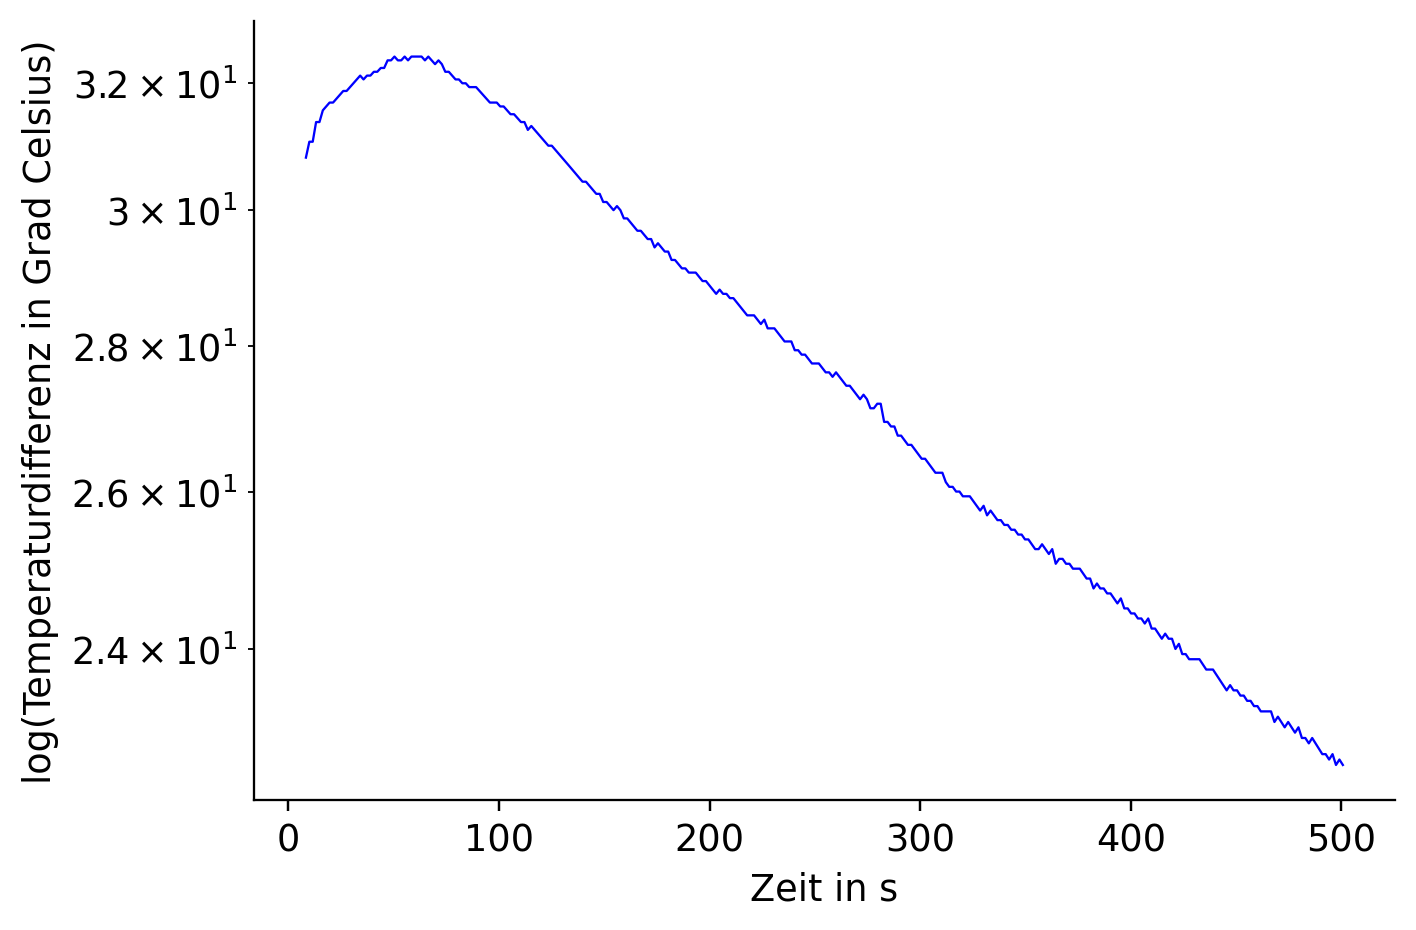

In [5]:
# TODO: Use the temperature and time data for plotting
temperature_diff = temperature_sensor_2 - temperature_sensor_1

fig, ax = plt.subplots()
ax.plot(timestamp_sensor_1, temperature_diff,color = 'blue')
ax.set_xlabel("Zeit in s")
ax.set_ylabel("log(Temperaturdifferenz in Grad Celsius)")
ax.set_yscale("log")

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [6]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
T1 = max(temperature_sensor_1)
T2 = temperature_sensor_1[-1]
T_diff = temperature_diff

alpha, beta = np.polyfit(timestamp_sensor_1, np.log(T_diff), 1)
K = beta

# DONE #

#### (iV) Ergebnis

In [9]:
# TODO: Print result
print('Der Transportkoeffizient beträgt: K =', K)
# DONE #

Der Transportkoeffizient beträgt: K = 3.5165279853089424


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Nach sorgfältiger Analyse meines Diagramms und der Ermittlung des Abkühlungskoeffizienten komme ich zu dem Schluss, dass das Newtonsche Abkühlungsgesetz für meinen Kamillen-Tee gültig ist.
Wie an dem Graphen erkennbar ist, ist in der logarithmischen Skala ein linearer Verlauf zu erkennen, was auf einen exponentiellen Abfall hinweist.
Zudem ist auch eine Proportionalität zwischen Abkühlrate und Temperaturdifferenz zu erkennen. Dies bestätigt die anfängliche Forschungsfrage, dass das Abkühlen meines heißen Tees mit dem Newtonsches Abkühlungsgesetz modelliert werden kann und somit mir dabei hilft den Moment zu erkennen, wann es möglich ist meinen Tee zu trinken ohne mich dabei zu verbrennen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Es hat sich bewiesen, dass sich der Versuch mit dem Gesetz sehr gut vorhersagen kann, was auch bedeutet, dass man die Formel mit einem hohen Maß an Sicherheit und geringer Abweichung nutzen kann. Somit können auch alltägliche Situationen, speziell im Winter, sehr anschaulich und einfach modelliert und erklärt werden.